# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [3321]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [3324]:
data = pd.read_csv("ExtraaLearn.csv")

In [3326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [3328]:
data.shape

(4612, 15)

In [3330]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [3332]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3334]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [3336]:
data["status"].value_counts(normalize=True)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

In [3338]:
(data["page_views_per_visit"] >=1).value_counts(normalize=True)

page_views_per_visit
True     0.868387
False    0.131613
Name: proportion, dtype: float64

In [3340]:
data["current_occupation"].value_counts(normalize=True)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64

In [3342]:
data["first_interaction"].value_counts(normalize=True)

first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64

In [3344]:
data["profile_completed"].value_counts()

profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64

In [3346]:
data["last_activity"].value_counts()

last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64

In [3348]:
data["print_media_type1"].value_counts()

print_media_type1
No     4115
Yes     497
Name: count, dtype: int64

In [3350]:
data["print_media_type2"].value_counts()

print_media_type2
No     4379
Yes     233
Name: count, dtype: int64

In [3352]:
data["digital_media"].value_counts()

digital_media
No     4085
Yes     527
Name: count, dtype: int64

In [3354]:
data["educational_channels"].value_counts()

educational_channels
No     3907
Yes     705
Name: count, dtype: int64

In [3356]:
data["referral"].value_counts()

referral
No     4519
Yes      93
Name: count, dtype: int64

## Observations:

  1) There are 4612 leads in this data set;
  2) Only around 30% of leads converted into paying customers. 
  3) Most leads were between 36 and 57 years old;
  4) The numerical features have a large variance in scale, but since we'll be using decision tress and random forests models, we don't need to worry about scaling;
     

## Sanity Checks
1) There are no null values;
2) The page_views_per_visit has some values lower than 1. As explained in the course forum, this is expected.
3) All categorical (non numerical) features seem to have values consistent with the data dictionary;

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate analysis

Using bar plots to visualise the distributions for the different categorical features:

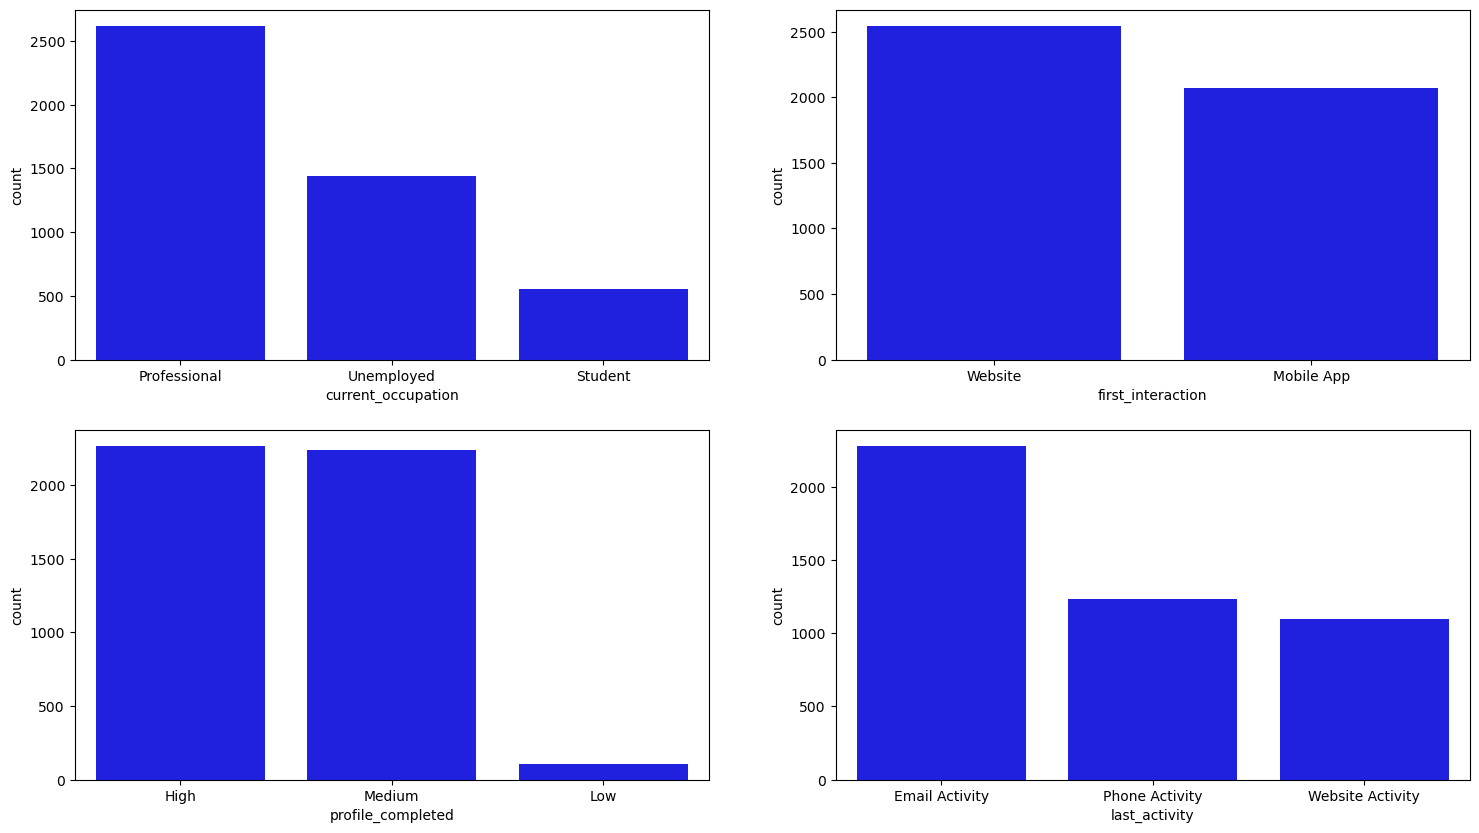

In [3362]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10))
sns.countplot(ax = axes[0, 0], x = 'current_occupation', data = data, color = 'blue',
              order = data['current_occupation'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'first_interaction', data = data, color = 'blue',
              order = data['first_interaction'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'profile_completed', data = data, color = 'blue',
              order = data['profile_completed'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'last_activity', data = data, color = 'blue',
              order = data['last_activity'].value_counts().index);

### Comments ###
- The occupation and profile completeness categories show a unbalanced distribution. 

Using histograms for the numerical variables: 

<Axes: xlabel='page_views_per_visit', ylabel='Count'>

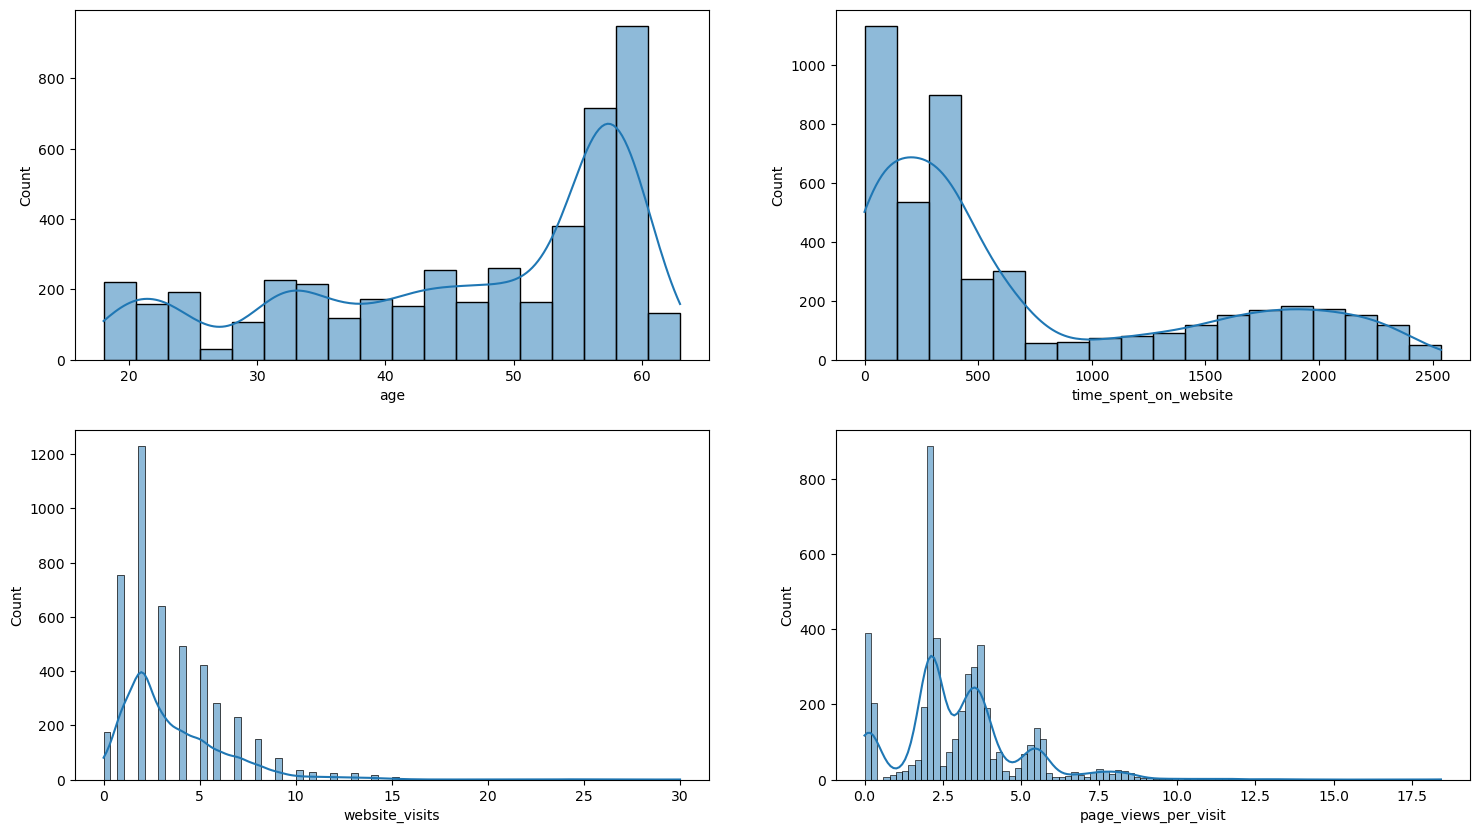

In [3365]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10))
sns.histplot(x='age', data=data, kde = True, ax=axes[0,0])
sns.histplot(x='time_spent_on_website', data=data, kde=True, ax=axes[0,1])
sns.histplot(x='website_visits', data=data, kde=True, ax=axes[1,0])
sns.histplot(x="page_views_per_visit", data=data, kde=True, ax=axes[1,1])

### Comments ###
- Website visits, time spent on website and page views per visit all show a right skewness;
- The age distribution is quite interesting. As a whole, it may appear left skwewed, but if we split it into two separate ranges, the one from 18 to 50 would show a uniform pattern, whilst the remaining range presents a normal distribution. 

In [3368]:
def boxplot_numerical_vars(df):
    fig, axes = plt.subplots(2, 2, figsize = (18, 10))
    sns.boxplot(x='age', data=df, ax=axes[0,0])
    sns.boxplot(x='time_spent_on_website', data=df, ax=axes[0,1])
    sns.boxplot(x='website_visits', data=df, ax=axes[1,0])
    sns.boxplot(x="page_views_per_visit", data=df, ax=axes[1,1])

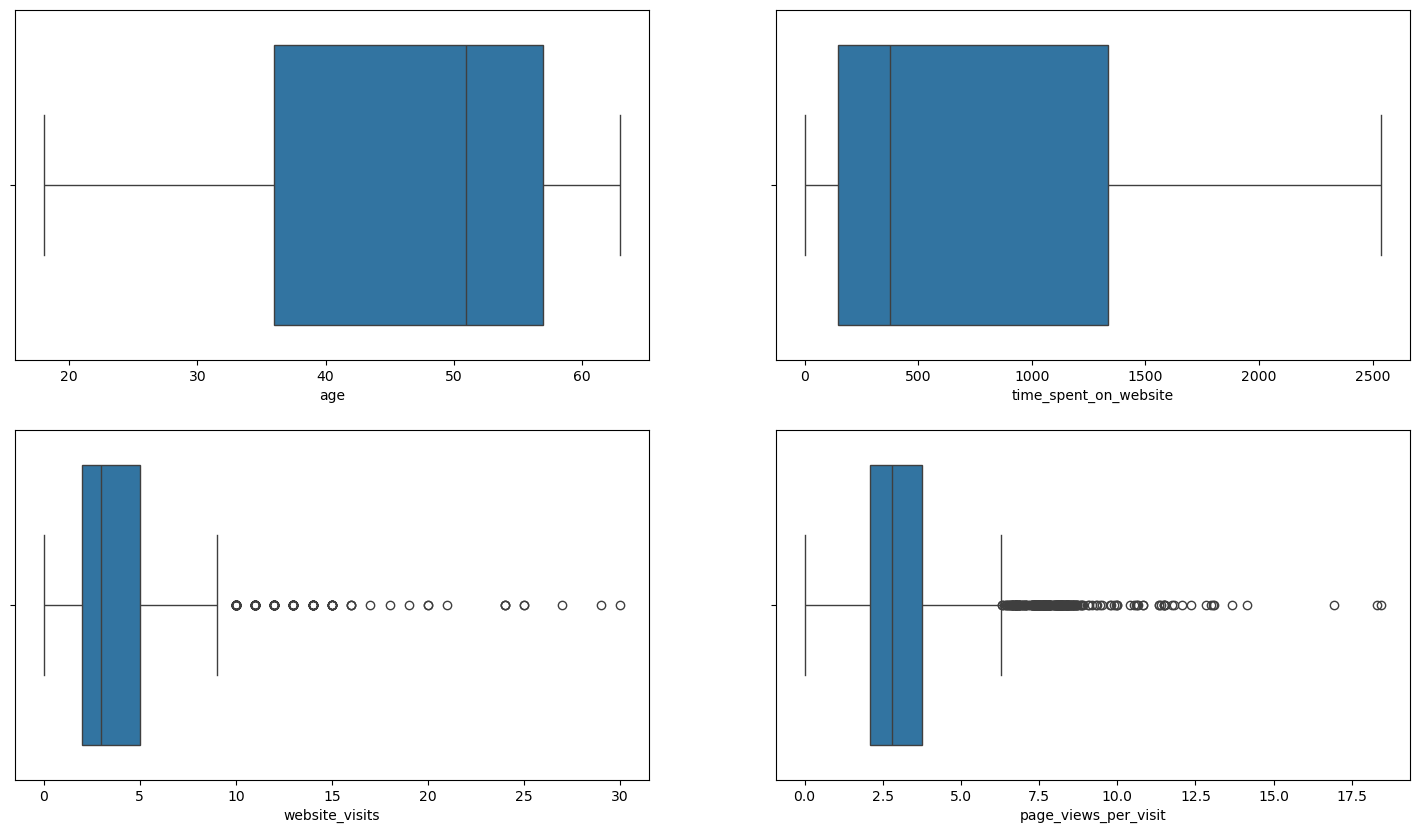

In [3370]:
boxplot_numerical_vars(data)

### Comments ###
The boxplot for the numerical variables show that "website_visits" and "page_views_per_visit" both have many outliers, with a high order of variance.

## Bivariate Analysis

Let's split the data set between the two outcomes of the target variable (paying/not paying), so that we can use scatter plots for detecting any possible trends between different independent variables and the target one.

In [3374]:
# subsetting the data
paying = data.loc[(data.status == 1)]
not_paying	= data.loc[(data.status == 0)]

In [3376]:
paying.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1377.0,48.663762,11.293692,18.0,41.000,54.000,58.00,63.000
website_visits,1377.0,3.538126,2.721075,0.0,2.000,3.000,5.00,25.000
time_spent_on_website,1377.0,1068.397967,780.856643,0.0,390.000,789.000,1829.00,2537.000
page_views_per_visit,1377.0,3.027050,1.896893,0.0,2.083,2.935,3.73,13.656
status,1377.0,1.000000,0.000000,1.0,1.000,1.000,1.00,1.000


In [3378]:
not_paying.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3235.0,45.153014,13.748843,18.0,33.0000,49.000,57.0000,63.000
website_visits,3235.0,3.578980,2.874222,0.0,2.0000,3.000,5.0000,30.000
time_spent_on_website,3235.0,577.420711,676.340484,0.0,88.0000,317.000,646.0000,2531.000
page_views_per_visit,3235.0,3.025732,1.997962,0.0,2.0745,2.706,3.7735,18.434
status,3235.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.000


In [3380]:
paying['first_interaction'].value_counts(normalize=True)

first_interaction
Website       0.841685
Mobile App    0.158315
Name: proportion, dtype: float64

In [3382]:
not_paying['first_interaction'].value_counts(normalize=True)

first_interaction
Mobile App    0.572488
Website       0.427512
Name: proportion, dtype: float64

In [3384]:
paying['profile_completed'].value_counts(normalize=True)

profile_completed
High      0.687001
Medium    0.307190
Low       0.005810
Name: proportion, dtype: float64

In [3386]:
not_paying['profile_completed'].value_counts(normalize=True)

profile_completed
Medium    0.561978
High      0.407419
Low       0.030603
Name: proportion, dtype: float64

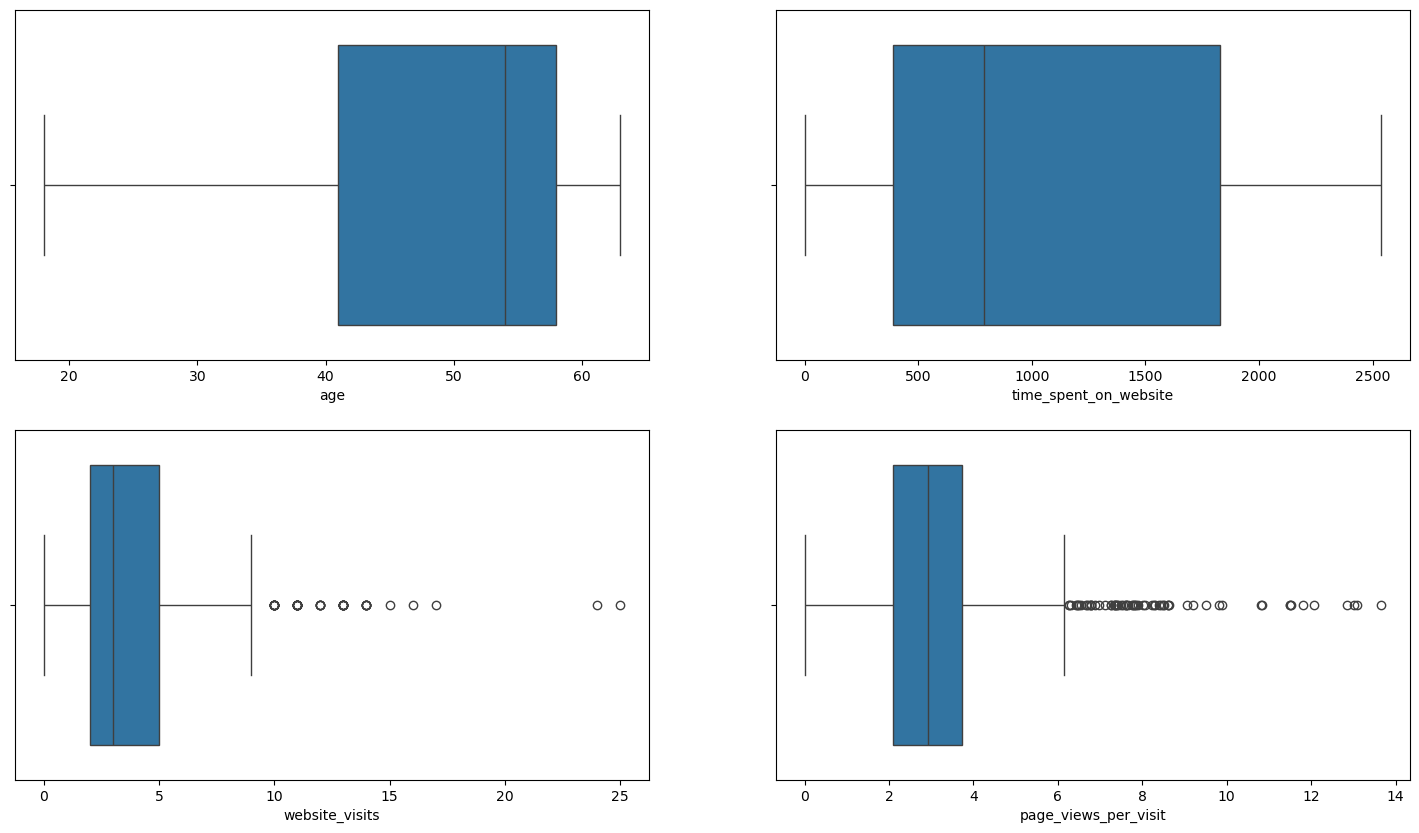

In [3388]:
boxplot_numerical_vars(paying)

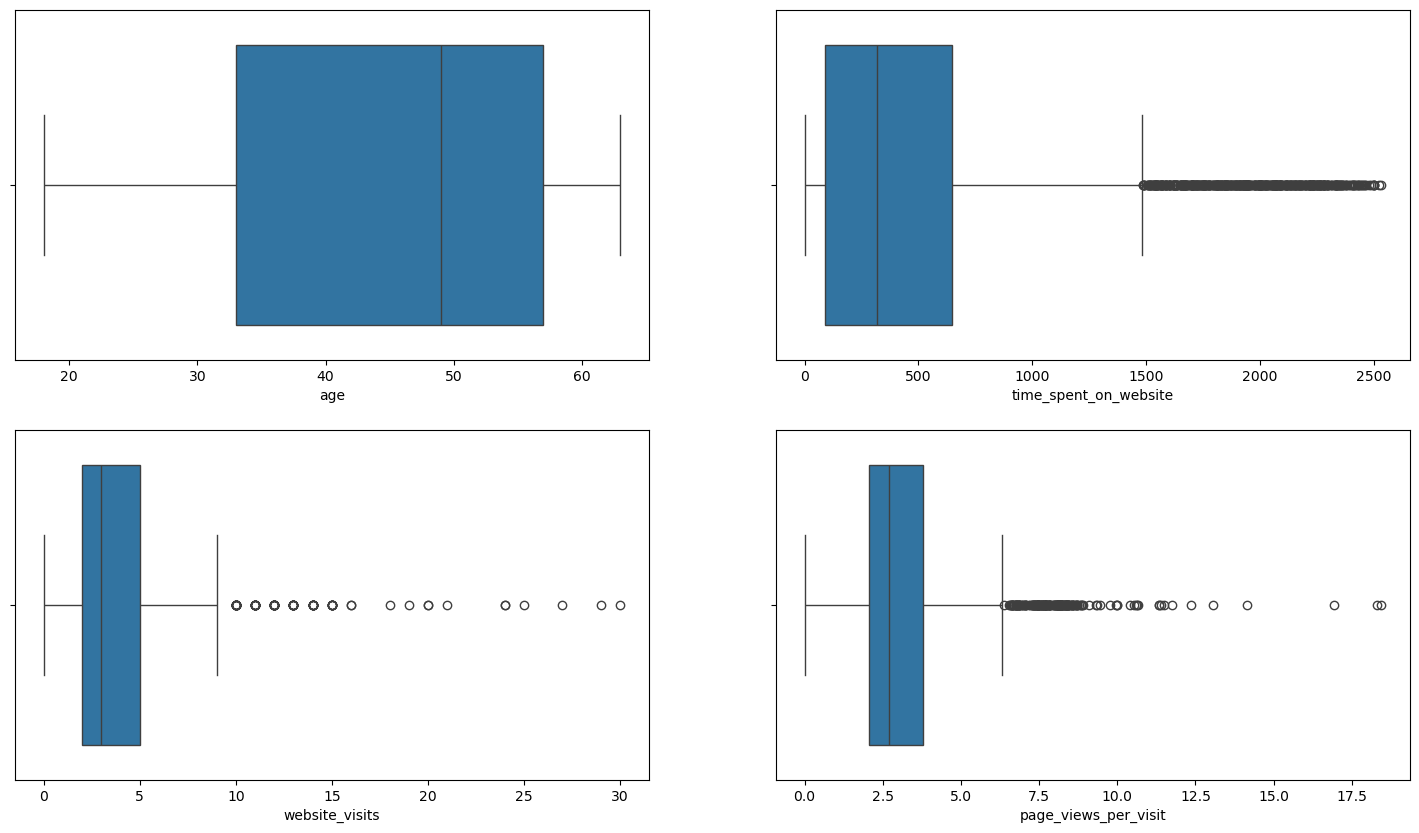

In [3390]:
boxplot_numerical_vars(not_paying)

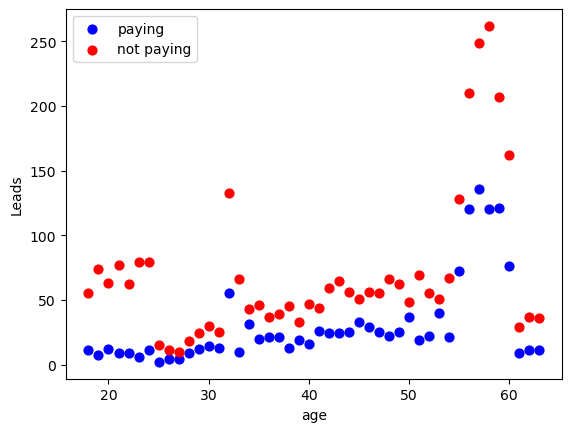

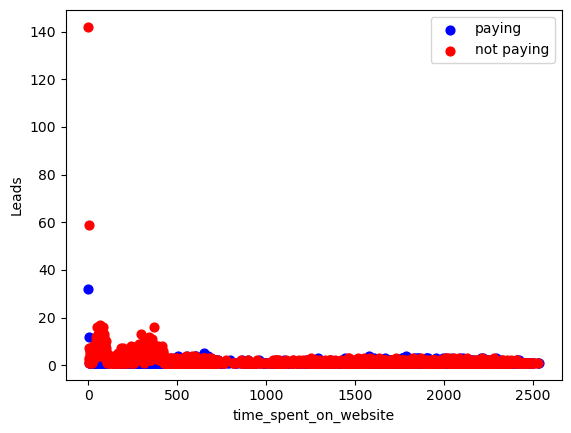

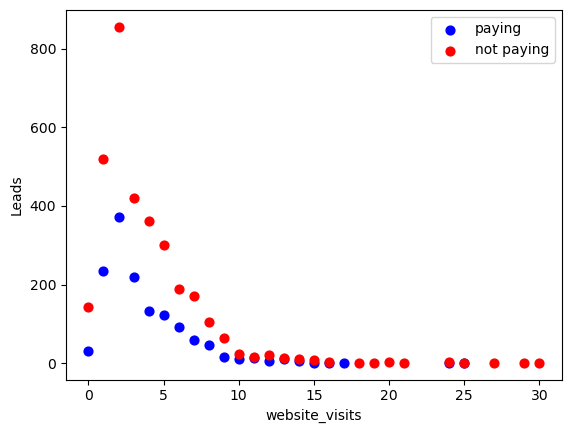

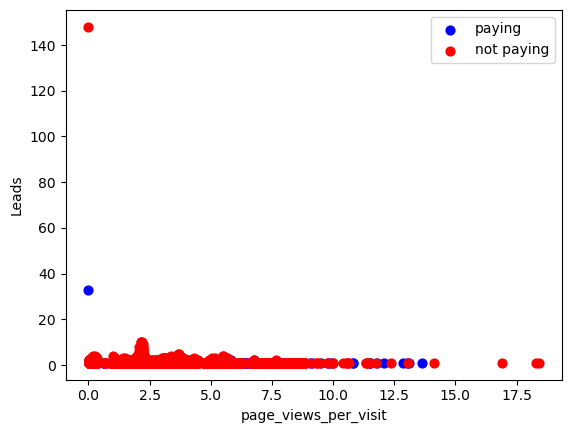

In [3392]:
# plotting
import matplotlib as mpl
from matplotlib	import pyplot as plt

def scatter_plot(paying_df, not_paying_df, variable):
    paying = paying_df[variable].value_counts() #failures.groupby('X')
    not_paying = not_paying_df[variable].value_counts()
    plt.scatter(paying.index, paying, c='blue', s=40)
    plt.scatter(not_paying.index, not_paying, c='red', s=40)
    plt.xlabel(variable)
    plt.ylabel('Leads')
    plt.legend(['paying', 'not paying'])
    plt.show()

scatter_plot(paying, not_paying, 'age')
scatter_plot(paying, not_paying, 'time_spent_on_website')
scatter_plot(paying, not_paying,'website_visits')
scatter_plot(paying, not_paying,"page_views_per_visit")

<Axes: >

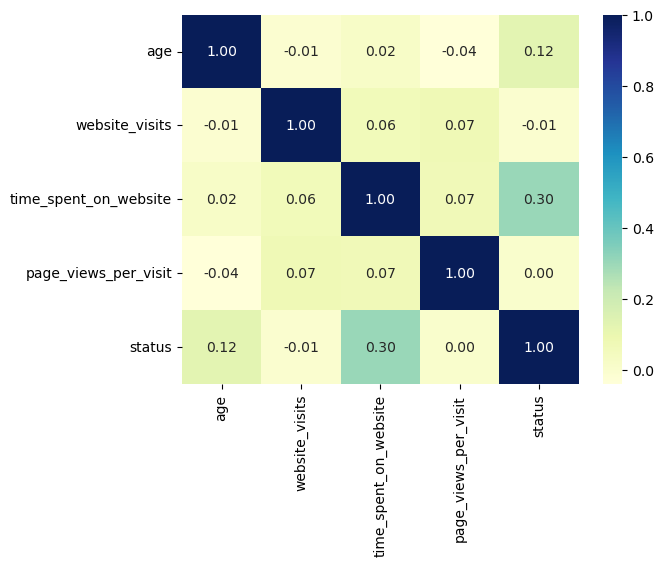

In [3394]:
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='YlGnBu')

<Axes: >

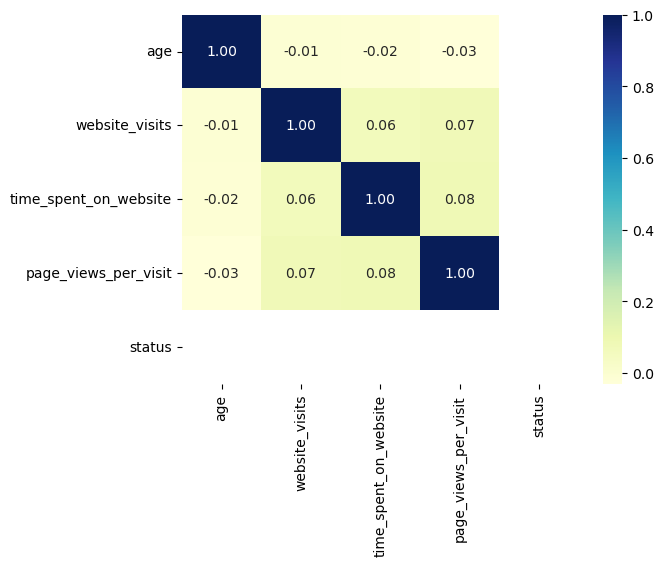

In [3396]:
sns.heatmap(paying.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='YlGnBu')

<Axes: >

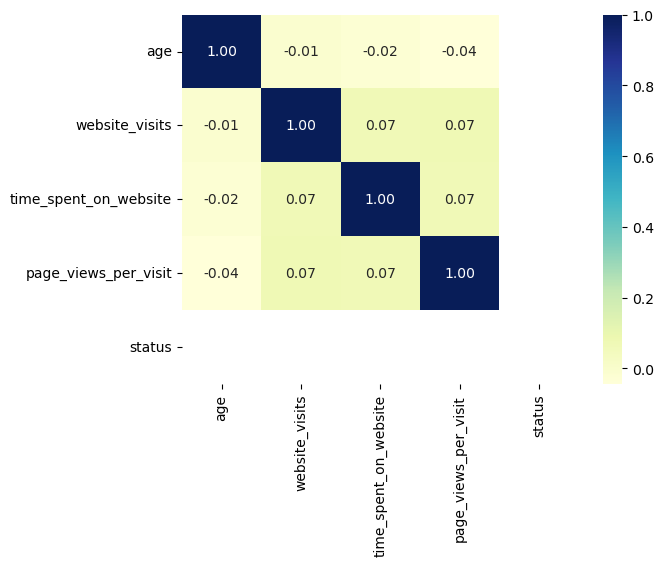

In [3398]:
sns.heatmap(not_paying.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='YlGnBu')

### Heatmap Observation ###
The heatmap shows no correlation between any of the numeric variables.

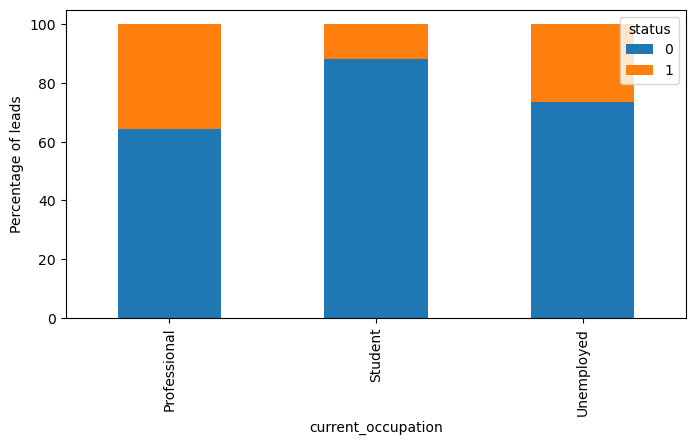

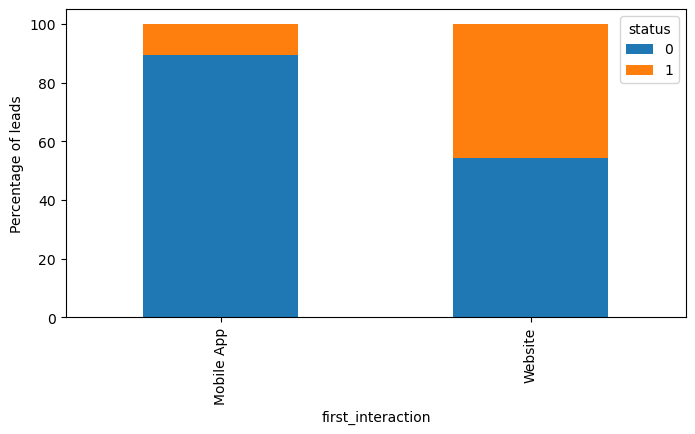

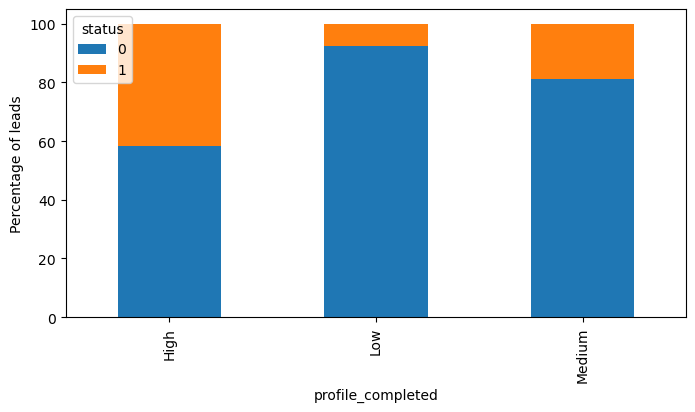

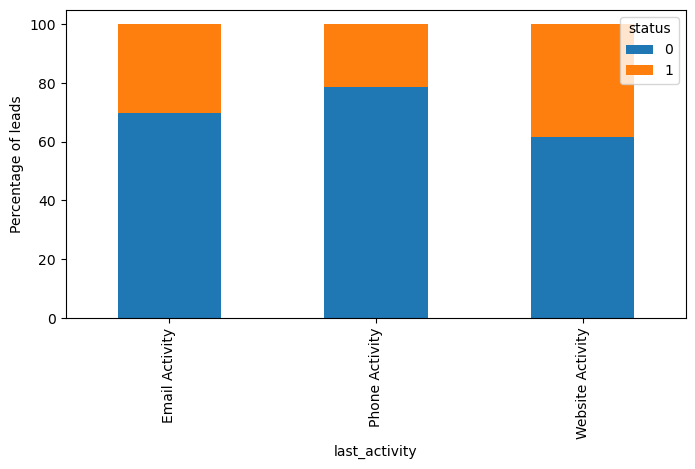

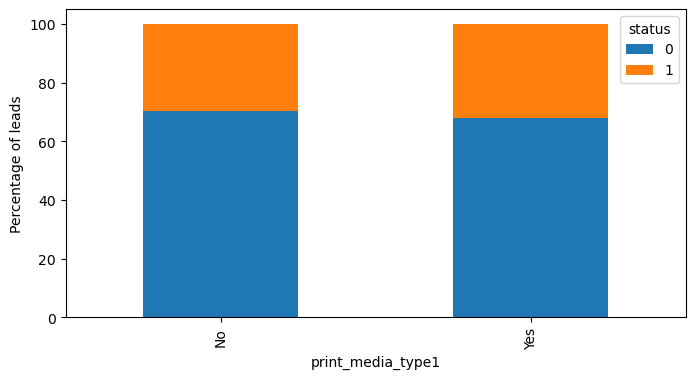

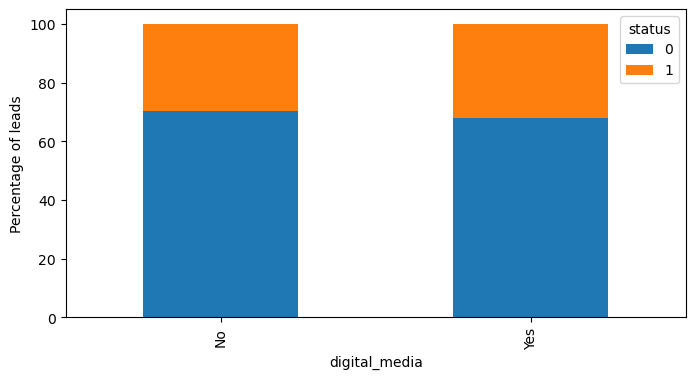

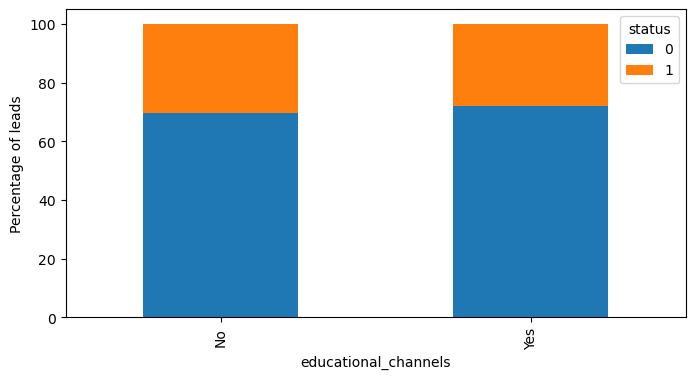

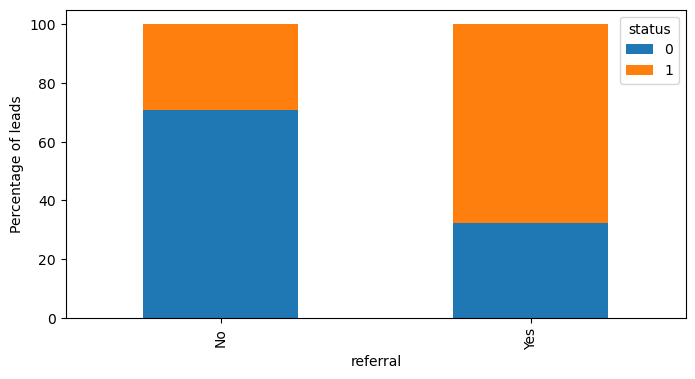

In [3401]:
categ_cols = ['current_occupation','first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'digital_media','educational_channels','referral']
for feat in categ_cols:
    (pd.crosstab(data[feat], data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
    plt.ylabel('Percentage of leads')

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Observations**
1. Numerical variables show little correlation, the highest value is a 0.3 positive relation between time spent on website and status, which is still low;
2. When splitting between status (paying/not paying), there's no clear correlation between the numeric variables on either split;
3. Scatter plots showed no pattern between the different numerical values and the status;
4. For the categorical variables, stacked bar plots of each individual category and related status count can be useful. These visualisations led to the following conclusions:
   * Occupation status show that professional leads have a higher conversion rate, than students or unemployed.
   * Website as the first channel of interaction led to a higher conversion rate than the mobile app.
   * Website as a general interaction channel seems to lead to higher conversion rate than email or phone calls.
   * Referrals leads to higher conversion rate than print media, digital media or educational channels.
   * Higher details in profile completion seem to correlate with higher conversion rates.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Pre-processing actions**
- Based on the observations above, we can see that there's no missing values.
- Both website visits and page views boxplots showed many outliers with a high scale of variance. However, since we are building decision tree and random forest models, which are normally robust to outliers and variance, we won't be doing any treatment to these variables.
- The "profile_completed" categorical variable shows a sense of order in its values, where the values "low", "medium" and "high" can be encoded as 0, 1 and 2, respectively.
- The 'print_media_type1','print_media_type2','digital_media','educational_channels' and 'referral' categorical variables need to be encoded to numerical values before we can use the data set to build a model.
- The remaining categorical values, 'current_occupation','first_interaction', 'last_activity', can be converted into dummy variables.
- The ID column, as a unique identifier, should be dropped before we build the decision model.
- Finally, we are going to split the pre-processed dataset into a training and testing set, for training and validating the models.

In [3407]:
#Creating a new data frame with the dummy variables
dummies = ['first_interaction', 'last_activity','current_occupation']
data_dummies = pd.get_dummies(data = data, columns = dummies, drop_first=True) 

In [3409]:
#Encoding the "profile_completed" variable into the related numerical values
data_dummies['profile_completed'] = data_dummies['profile_completed'].map({'High':2, 'Medium': 1, 'Low':0})

In [3411]:
mappings = ['print_media_type1','print_media_type2','digital_media','educational_channels','referral']
for col in mappings:
    data_dummies[col] = data_dummies[col].map({'Yes': 1, 'No':0})

In [3413]:
data_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
profile_completed,4612.0,1.467693,0.543526,0.0,1.00000,1.000,2.00000,2.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
print_media_type1,4612.0,0.107762,0.310114,0.0,0.00000,0.000,0.00000,1.000
print_media_type2,4612.0,0.050520,0.219040,0.0,0.00000,0.000,0.00000,1.000
digital_media,4612.0,0.114267,0.318170,0.0,0.00000,0.000,0.00000,1.000
educational_channels,4612.0,0.152862,0.359894,0.0,0.00000,0.000,0.00000,1.000
referral,4612.0,0.020165,0.140579,0.0,0.00000,0.000,0.00000,1.000


In [3415]:
# Separating the target variable from the independent variables as a pre-requisite for the model training
y=data_dummies['status']
# Dropping the 'ID' and 'target'variable columns from the data frame to be used for training and validation (testing)
X=data_dummies.drop(columns = ['ID', 'status'])

In [3417]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

### EDA after the pre-processing
- The transformations performed above have mainly conveted catogorical variables into some numerical format. We had also applied the log function over the 'website_visits' and the 'page_views_per_visit' variables, so it makes sense to analyse the impacts of these by plotting two types of charts:
  1. A heatmap of the potential correlations of the numeric variables;
  2. The boxplots of the 'website_visits' and the 'page_views_per_visit' variables. Since we maintenaid the orignal dataframe, we can plot charts for these variables both before and after the log transformations;

<Axes: >

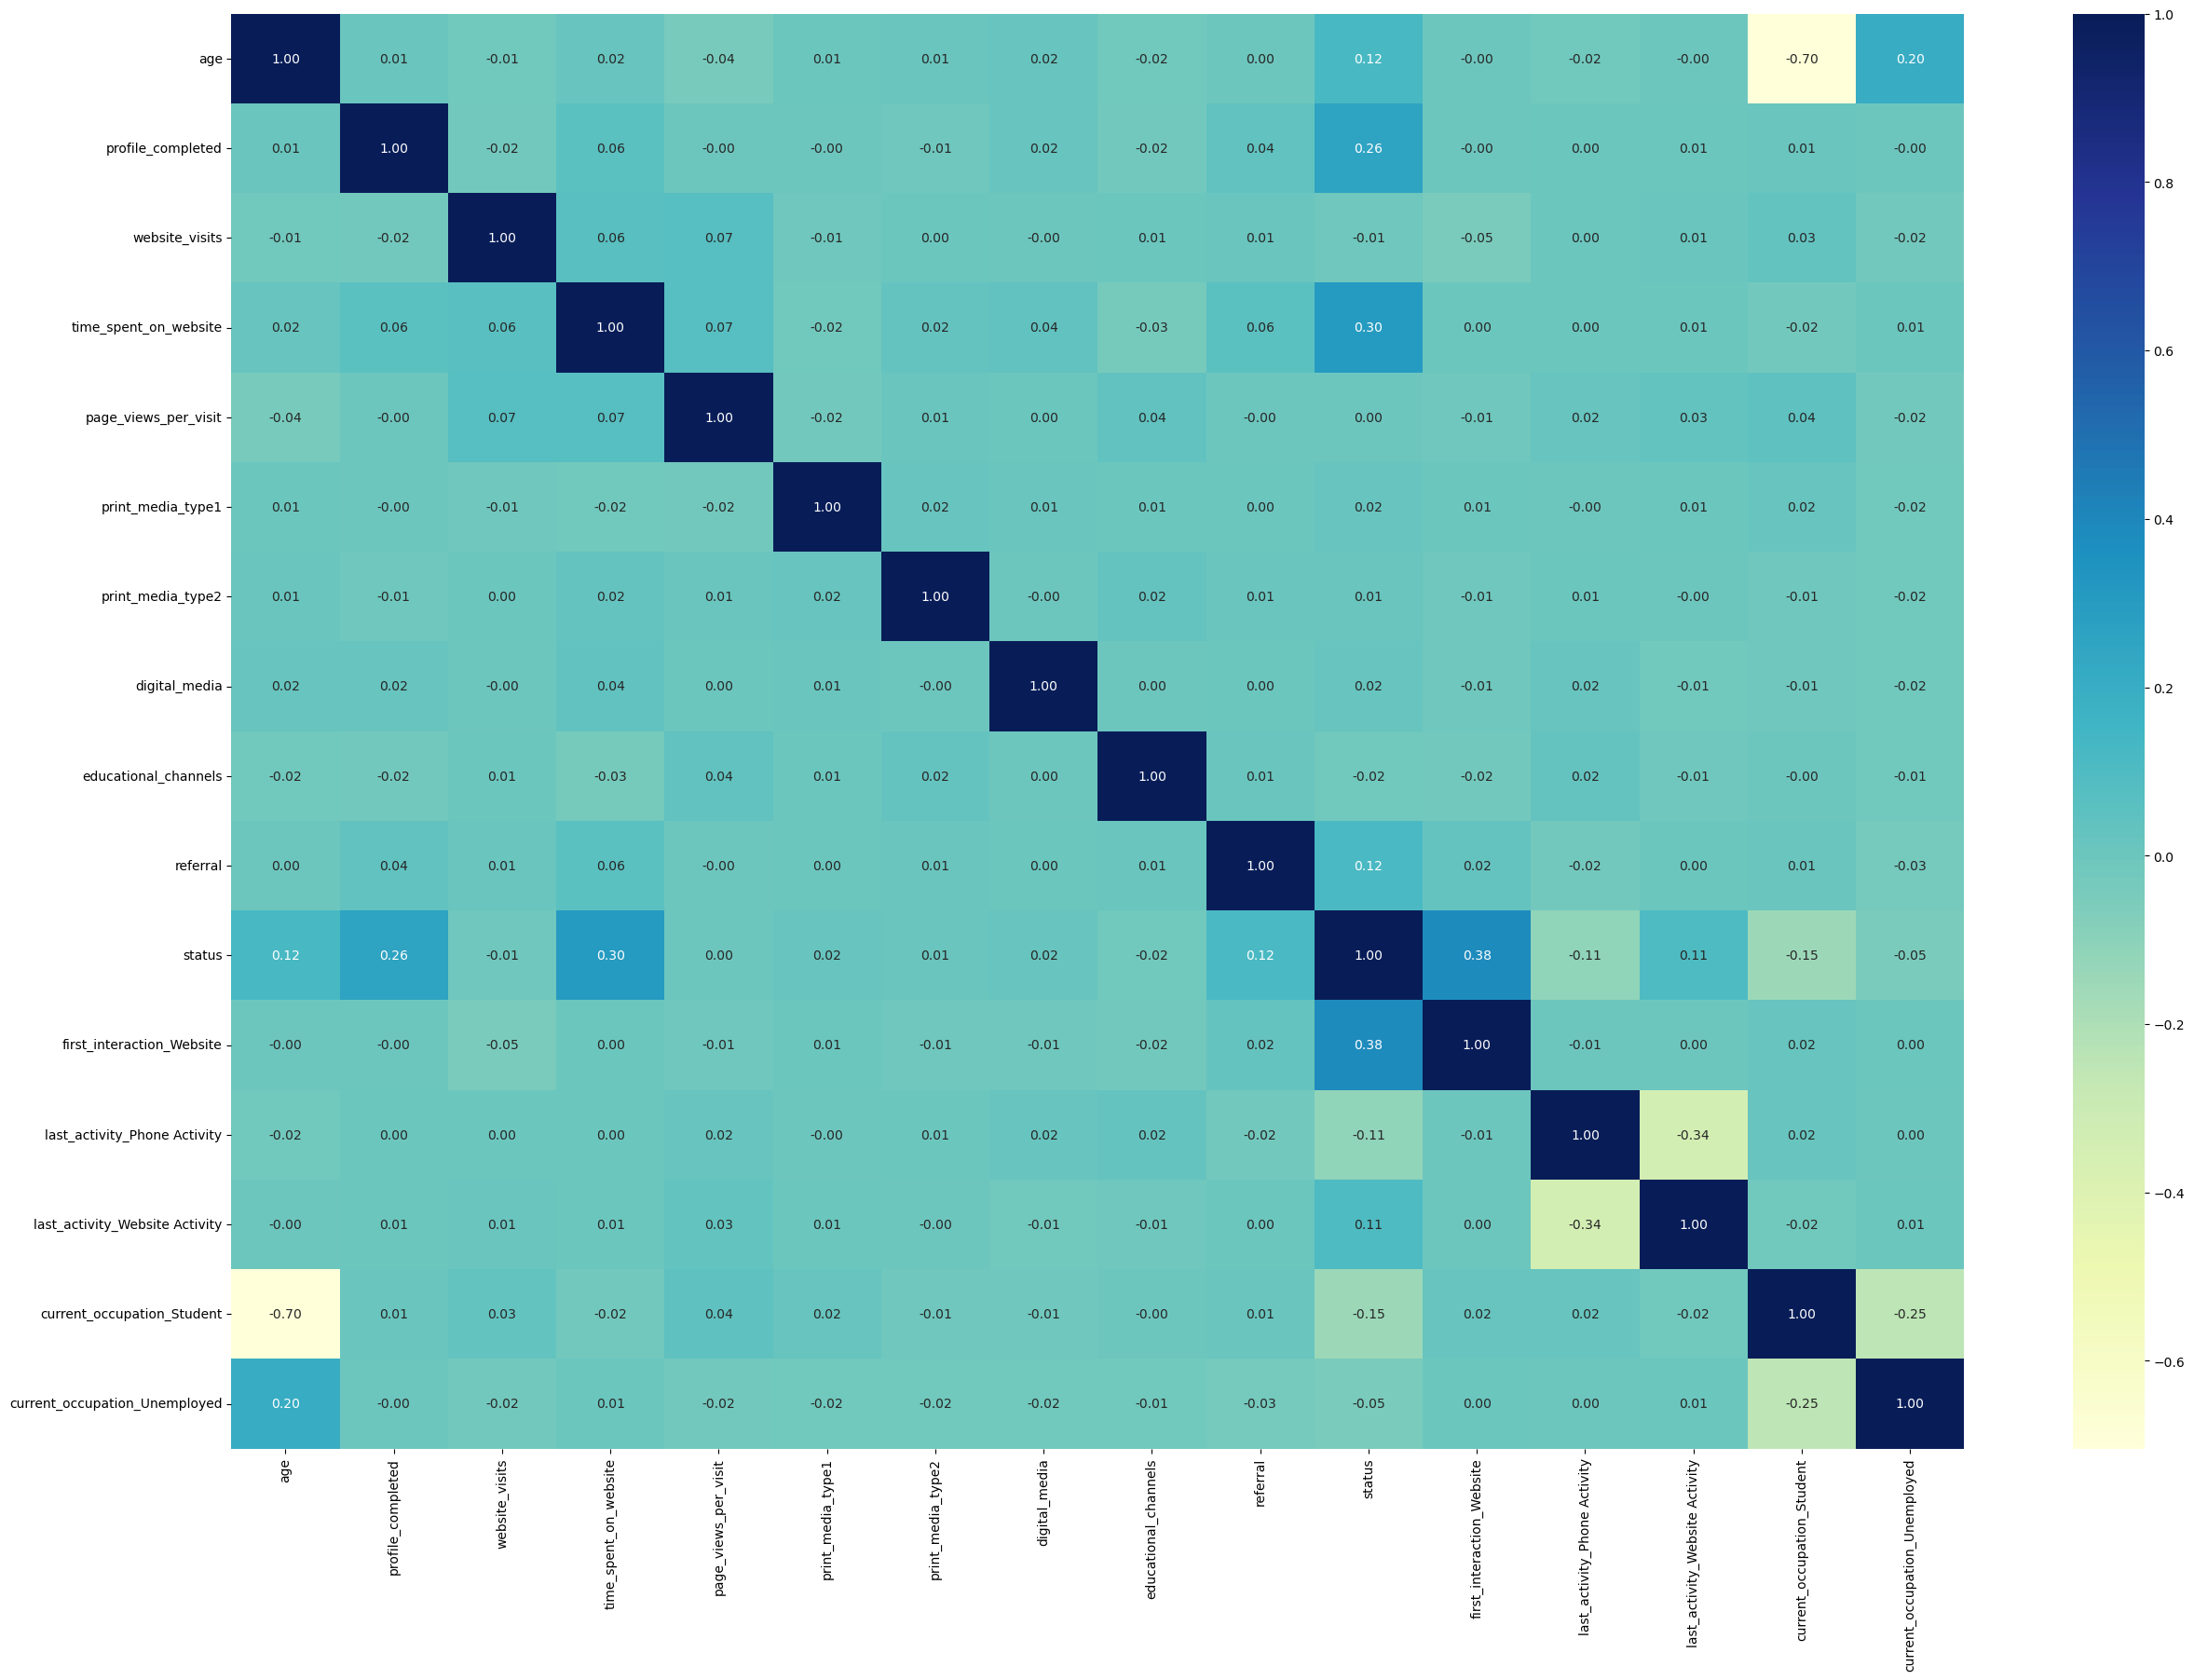

In [3420]:
plt.figure(figsize = (30, 20))
sns.heatmap(data_dummies.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='YlGnBu')

### Heatmap conclusions
- Status doesn't show any strong correlation with any particular variable;
- The only correlation appears between age and student occupation, in this case, it's a negative correlation, which makes sense;

## Building a Decision Tree model

In [3424]:
# Building decision tree model. We've noticed the distribution of status is unbalanced, 
# with non-paying leads comprising 70% of the dataset, and the paying customers only 30%, so let's set class_weight to 'balanced'
dt = DecisionTreeClassifier( random_state = 1, class_weight = 'balanced')
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [3426]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [3428]:
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



<Axes: >

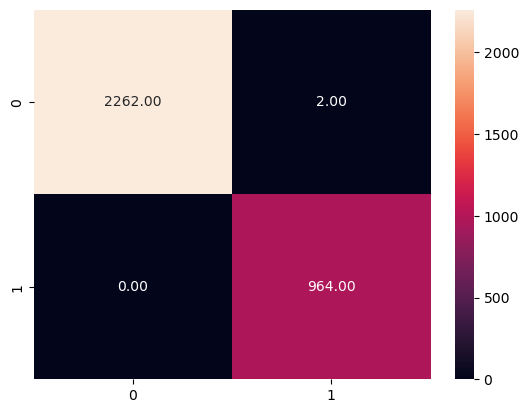

In [3430]:
sns.heatmap(confusion_matrix(y_train, dt.predict(X_train)), annot=True, fmt='.2f')

In [3432]:
test_predictions = dt.predict(X_test)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.63      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



In [3434]:
def compute_scores(true_values, predictions, model_name):
    recall = recall_score(true_values, predictions)
    precision = precision_score(true_values, predictions)
    f1 = f1_score(true_values, predictions)
    accuracy = accuracy_score(true_values, predictions)
    df_scores = pd.DataFrame(
        {
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "accuracy": accuracy,
        },
        index=[model_name],
    )
    return df_scores

In [3436]:
dt_scores = compute_scores(y_test, test_predictions, 'DecisionTree')

<Axes: >

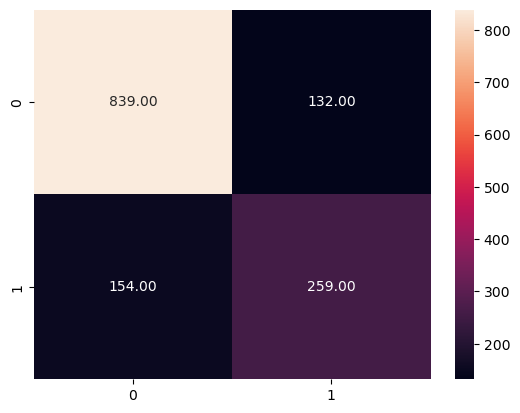

In [3438]:
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test)), annot=True, fmt='.2f')

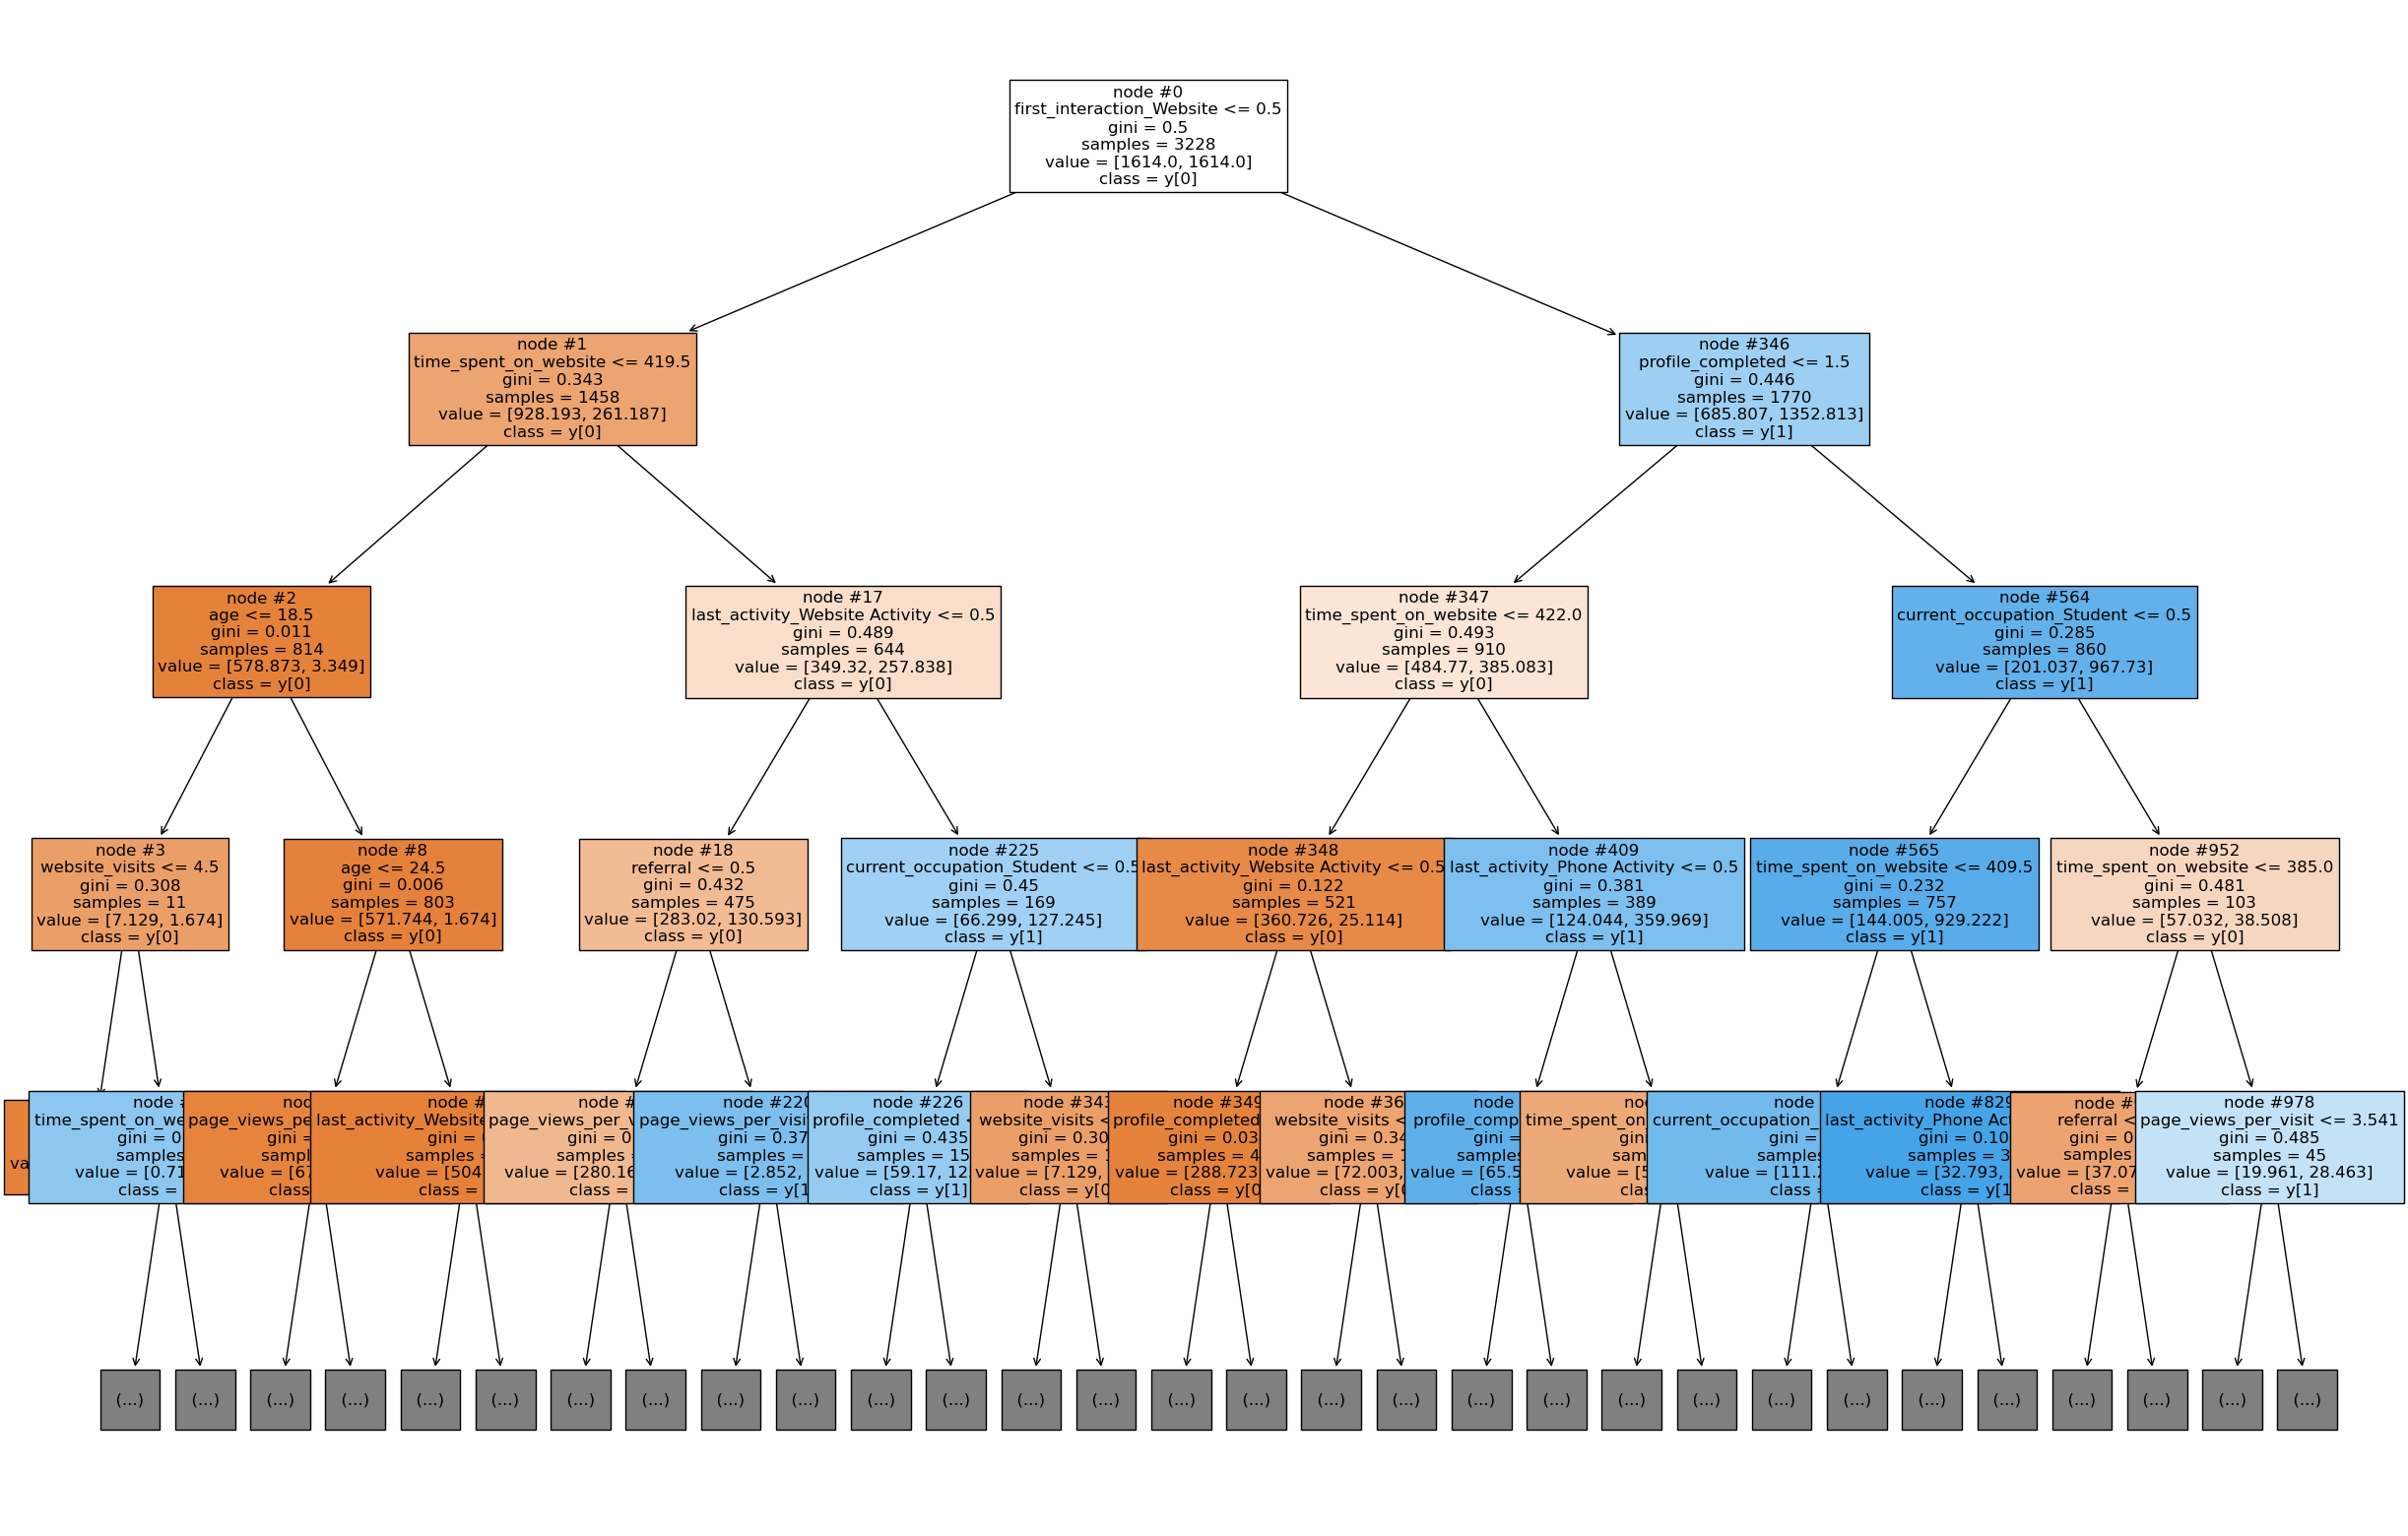

In [3440]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Do we need to prune the tree?

The differences in the accuracy and f1 scores between the training and test data indicate the model is overfitting, therefore, "pruning" the tree can make the model better at generalisations.
Before deciding on the ideal depth for pruning, we should first analyse the relevancy of each independent variable to the model:

In [3444]:
def plot_feat_importances(model):
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
    plt.figure(figsize = (8, 8))
    sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
    

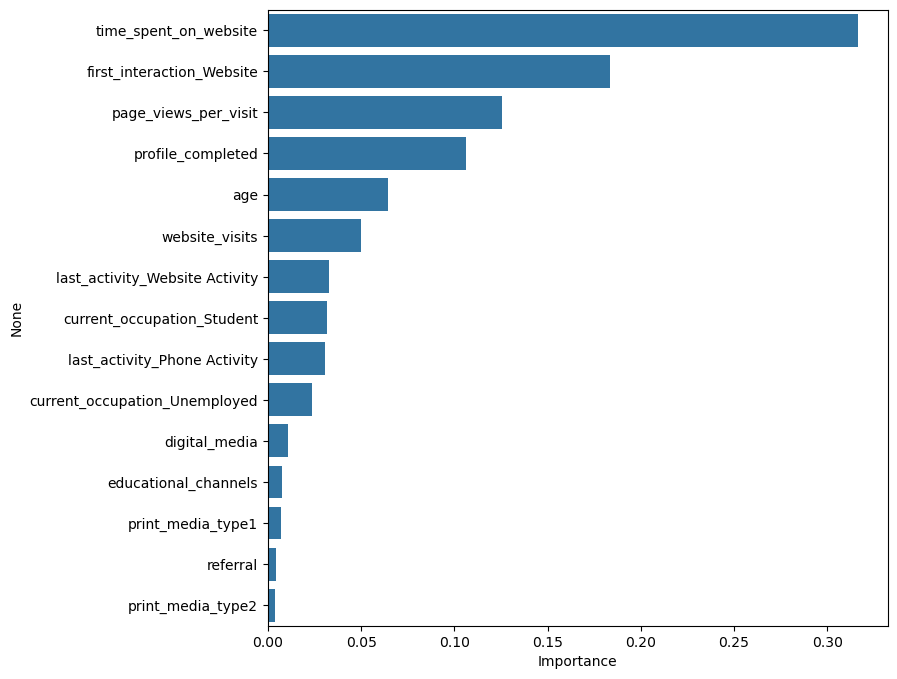

In [3446]:
plot_feat_importances(dt)

After visualising the feature importances above, it does look like the first six are the most siginificant. 
Let's use GridSearchCV to test different combinations of hyperparameters, including the tree depth:

In [3585]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['entropy',' gini'],            # Function to measure split quality
    'max_depth': [1,2,3,4,5,6,7,8,9,10,None],               # Maximum depth of the tree
    'min_samples_split': [2,3,4, 5, 6,7,8,9,10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1,2,3, 4,5, 6,7, 8],                # Minimum samples required to be a leaf node
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           scoring='recall' , cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', ' gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall', verbose=1)

In [3586]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [3589]:
best_model_dt = grid_search.best_estimator_

# Evaluate on the test set
y_pred_dt = best_model_dt.predict(X_test)

In [3591]:
print(classification_report(y_train, best_model_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2264
           1       0.61      0.90      0.73       964

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.80      0.81      3228



              precision    recall  f1-score   support

           0       0.94      0.75      0.83       971
           1       0.60      0.88      0.71       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



<Axes: >

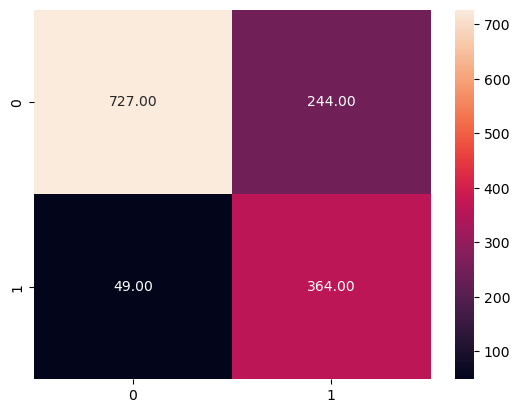

In [3593]:
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test,  y_pred_dt), annot=True, fmt='.2f')

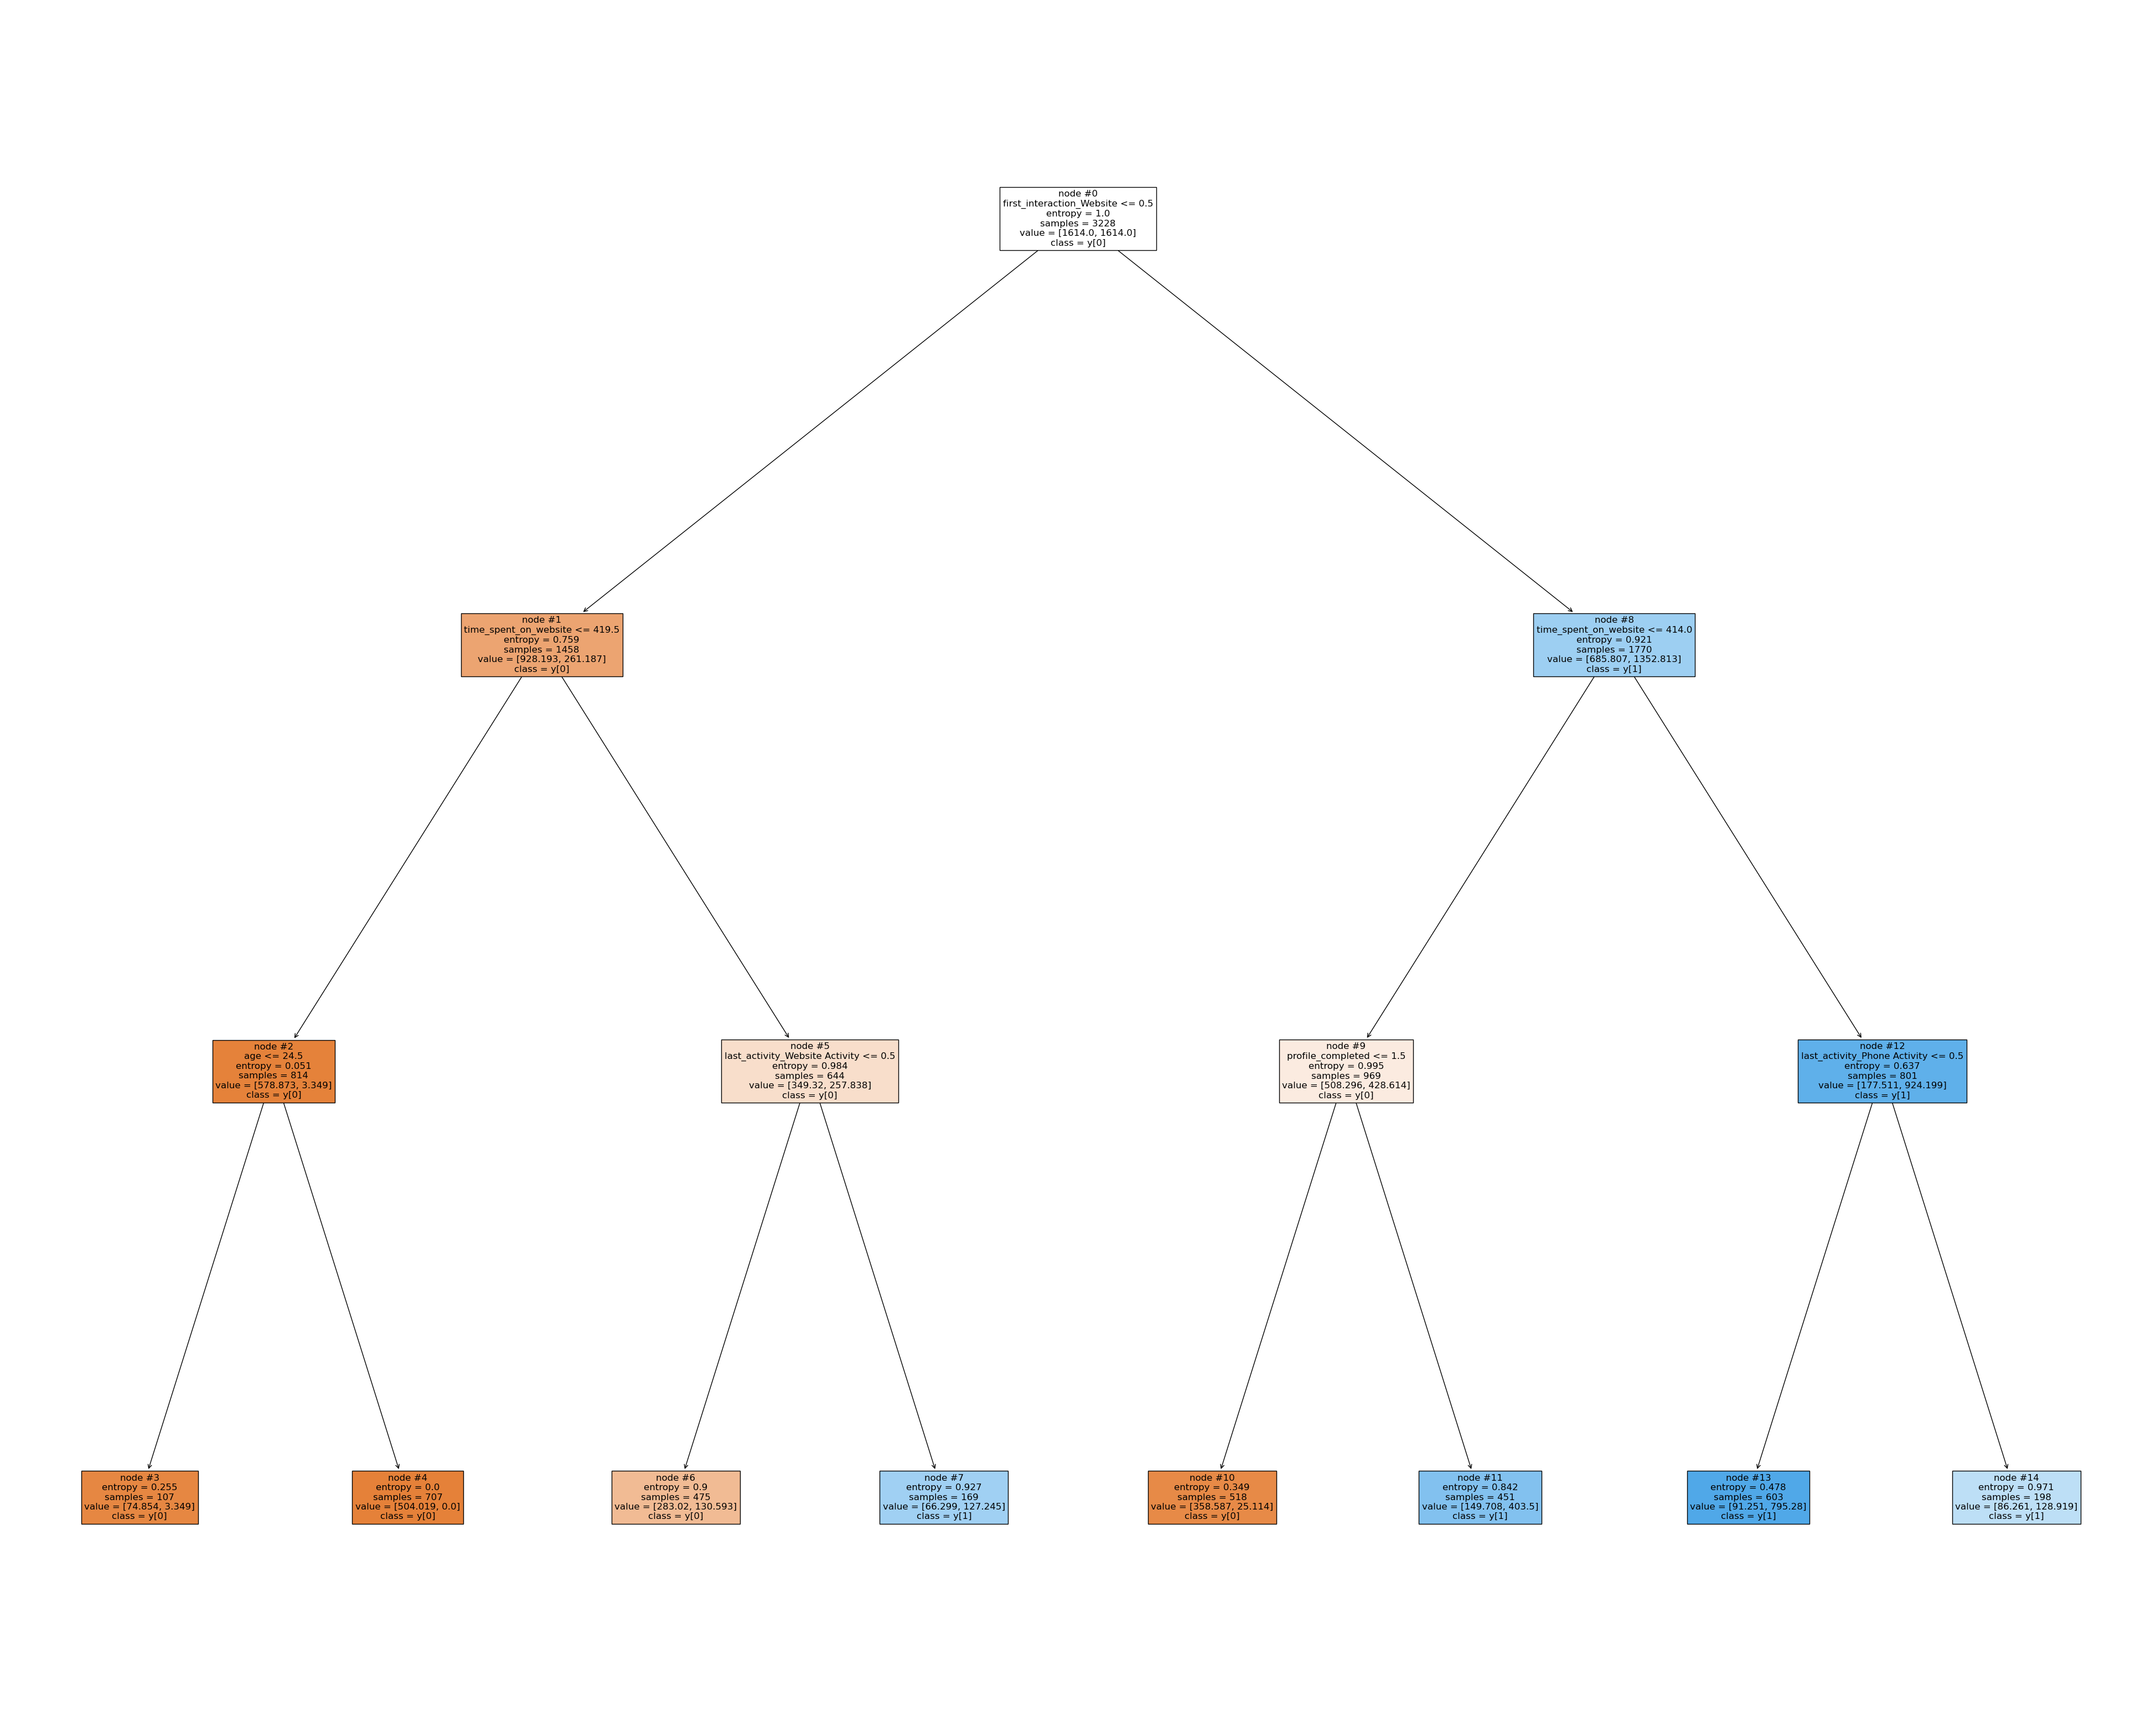

In [3595]:
features = list(X.columns)

plt.figure(figsize = (50, 40))

tree.plot_tree(best_model_dt, max_depth = 8, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

We can see that the resulting tree got pruned, and it presented better overall scores over the testing data. Let's check the hyper-parameters of both models:

In [3598]:
def compare_params(original, best):
    df_params = pd.DataFrame(original.get_params(),index=['Original'])
    df_params = pd.concat([df_params, pd.DataFrame(best.get_params(),index=['Best'])])
    return df_params

In [3600]:
compare_params(dt, best_model_dt)

,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,monotonic_cst,random_state,splitter
Original,0.0,balanced,gini,None,None,None,0.0,1,2,0.0,None,1,best
Best,0.0,balanced,entropy,3,None,None,0.0,1,2,0.0,None,1,best


The table above shows that the only 'criterion' and 'max_depth' has been changed between the original model and the best found by GridSearchCV.

In [3603]:
dt_best_scores = compute_scores(y_test, y_pred_dt, 'DecisionTree_Best')

In [3605]:
models_scores_df = pd.concat([dt_scores, dt_best_scores])

In [3607]:
models_scores_df

,precision,recall,f1,accuracy
DecisionTree,0.662404,0.627119,0.644279,0.793353
DecisionTree_Best,0.598684,0.881356,0.713026,0.788295


We can see in the scores summary above that the tuned model (DecisionTree_Best) had a better recall and f1 score, despite of a slightly lower accuracy.

## Building a Random Forest model

In [3611]:
# Building the Random Forest model
rf = RandomForestClassifier(random_state = 1, class_weight = 'balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [3613]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



In [3615]:
rf_test_predicted = rf.predict(X_test)

In [3617]:
print(classification_report(y_test, rf_test_predicted))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.72      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



<Axes: >

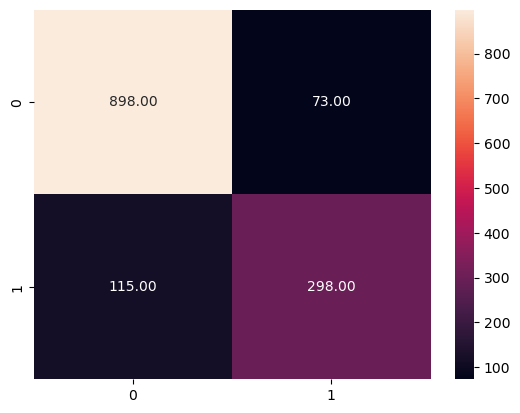

In [3619]:
sns.heatmap(confusion_matrix(y_test, rf_test_predicted), annot=True, fmt='.2f')

In [3621]:
rf_scores = compute_scores(y_test, rf_test_predicted, 'RandomForest')

## Do we need to prune the tree?

As with the original decision tree one, the random forest also shows divergence between the score from the training and testing data sets, so we need to tune the model hyper-parameters, which might include pruning. Let's use GridSearchCV to test different hyper parameter combinations.

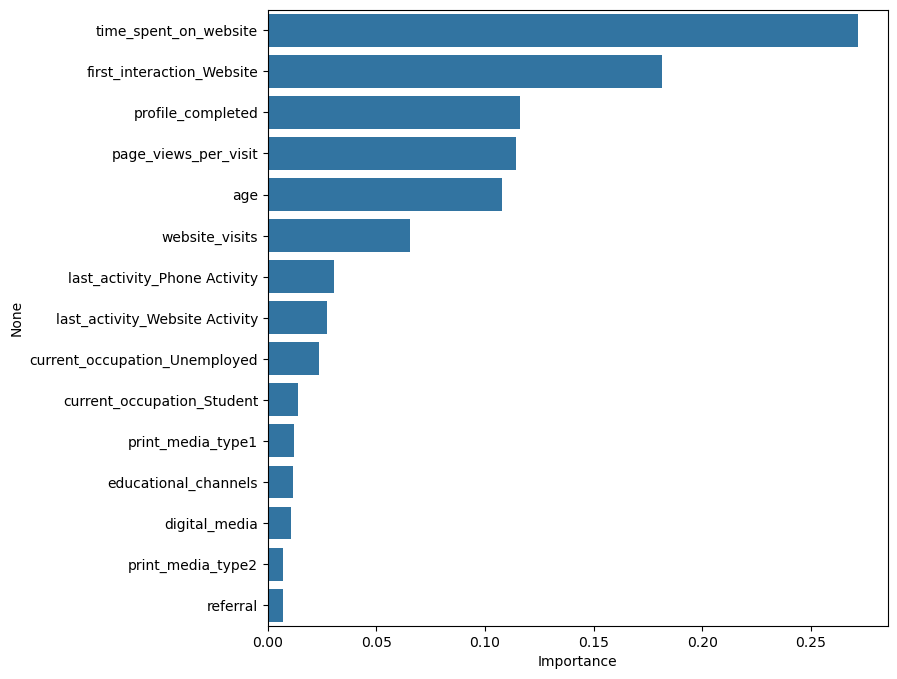

In [3624]:
# Plot the feature importance
plot_feat_importances(rf)

The random forest model also gave highest priority to the same six features we've seen in the original decision tree model, with only profile_completed swapping position with page_views_per_visit between the two models.

In [3627]:
param_grid = {
    'criterion': ['entropy',' gini'],            # Function to measure split quality
    'max_depth': [1,2,3,4,5,6,7,8,9,10, None],               # Maximum depth of the tree
    'min_samples_split': [2,3,4,5,6,7,8,9,10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1,2,3,4,5,6,7,8],                # Minimum samples required to be a leaf node
    "max_features": [0.7, 0.9, 'auto']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='recall' , cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4752 candidates, totalling 23760 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', ' gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [0.7, 0.9, 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall', verbose=1)

In [3629]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [3632]:
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [3634]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       971
           1       0.60      0.88      0.71       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



<Axes: >

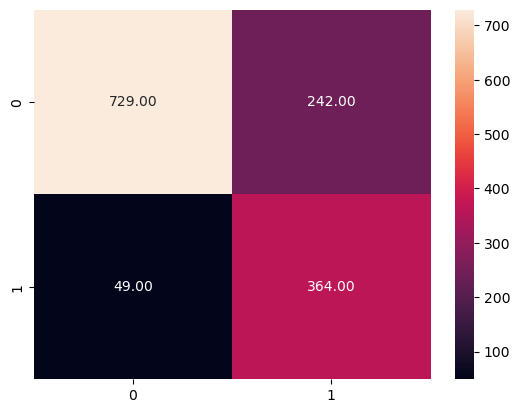

In [3636]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='.2f')

In [3638]:
compare_params(rf, best_model_rf)

,bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,monotonic_cst,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
Original,True,0.0,balanced,gini,None,sqrt,None,None,0.0,1,2,0.0,None,100,None,False,1,0,False
Best,True,0.0,balanced,entropy,3,0.9,None,None,0.0,1,2,0.0,None,100,None,False,1,0,False


After tuning hyper parameters with GridSearchCV, the best found model changed the criterion, max_depth and min_samples_leaf from the original. Let's next check the scores between these two models:

In [3641]:
rf_best_scores = compute_scores(y_test, y_pred_rf, 'RandomForest_Best')

In [3643]:
models_scores_df = pd.concat([rf_scores, rf_best_scores])

In [3645]:
models_scores_df

,precision,recall,f1,accuracy
RandomForest,0.803235,0.721550,0.760204,0.864162
RandomForest_Best,0.600660,0.881356,0.714426,0.789740


We can see in the scores summary above that the tuned model (RandonForest_Best) had a better recall and f1 score, despite of a slightly lower accuracy.

## Summary for the two best models ##
### Most Relevant Features ###
1) Ploting features for the best random forest model:

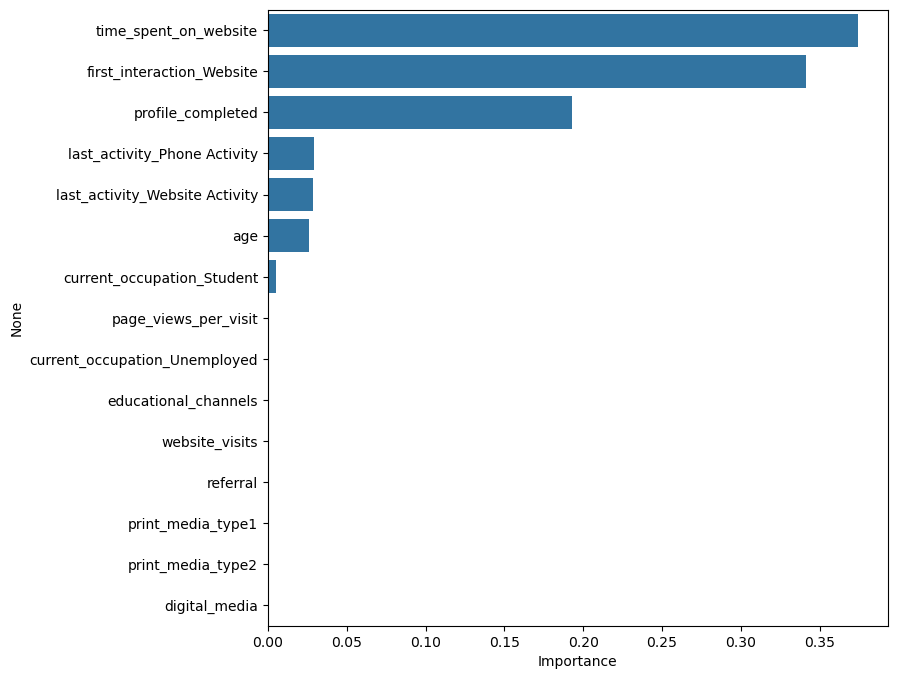

In [3649]:
plot_feat_importances(best_model_rf)

2) Ploting features for the best decision tree model:

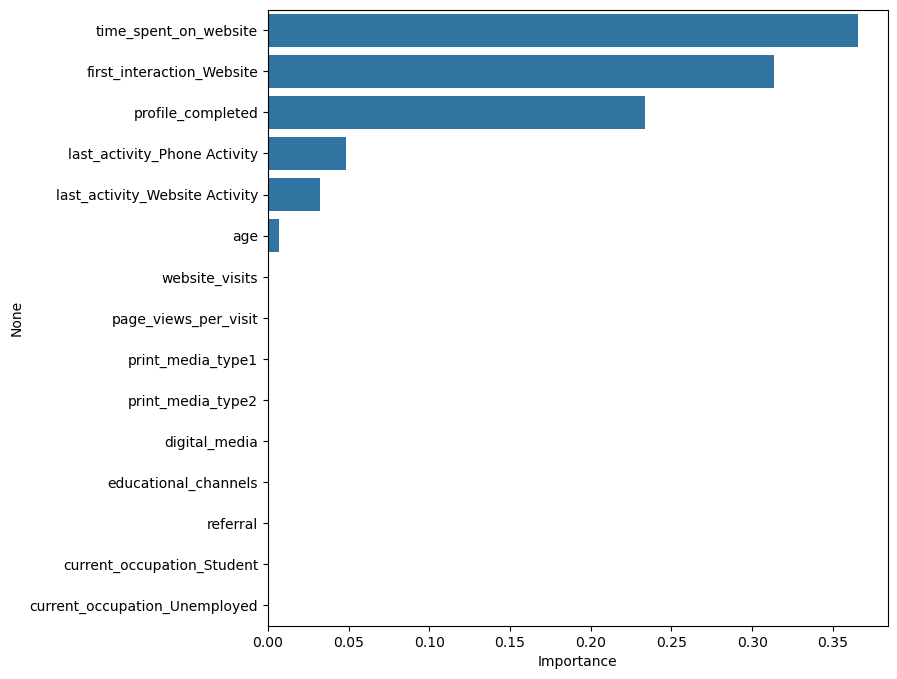

In [3652]:
plot_feat_importances(best_model_dt)

### Scores Comparison ###

In [3655]:
models_scores_df = pd.concat([dt_scores, dt_best_scores, rf_scores, rf_best_scores])

In [3657]:
models_scores_df

,precision,recall,f1,accuracy
DecisionTree,0.662404,0.627119,0.644279,0.793353
DecisionTree_Best,0.598684,0.881356,0.713026,0.788295
RandomForest,0.803235,0.721550,0.760204,0.864162
RandomForest_Best,0.600660,0.881356,0.714426,0.789740


## Actionable Insights and Recommendations

* We have built two prediction models:
  1) A random forest model that can be used to predict the likelihood of leads becoming paying customers with an accuracy of 79%. This model has a recall of 88% and a precision of 60%, totalling a f1-score of 71% when predicting paying customers.
  2) A decision tree model with an accuracy of 79%. This model has a recall of 88% and a precision of 60%, totalling a f1-score of 71% when predicting paying customers.
     
* A "false negative" in this use case means a paying customer that the model failed to predict correctly, therefore, could have higher negative impact to the business. To minimise that, we had prioritised the "recall" metric when tuning the hyperparameters of the models.
  
* Given the decision tree model has higher recall on the prediction of paying customers, it should be preferred over the random forest, despite having a lower accuracy and overall f1 score. 

* The models also helped in identifying the main factors influencing leads to become paying customers: 
  1) time_spent_on_website: Leads that become paying customers typically spent more time on the company website. The average time spent on website for paying customers was around 1068, whilst the average among non paying leads was 577.
  2) first_interaction_Website: 84% of paying customers had their first interaction via the website, rather than the mobile app.
  3) profile_completed: 68% of paying customers had a high level of profile completion. Among non-paying customers, only 40% had a high level of profile completion.
  4) Age: Most of the paying customers age range is between 41 and 58. Among non-paying customer, the age range is broader, varying from 33 to 57;
 
* Given the observations from the most relevant factors above, we can define the following profile for the typical paying customer:
  1) Prefers to use the website as the main channel of interaction, spending, on average, double of the time on the website than non paying customers;
  2) Tends to have high level of completion in its profile;
  3) Ages between 40 and 60 years old;
 
* Our business recommendations are:
  1) Allocate resources to identify more leads within the profile descrived above;
  2) Promote the website as the main channel of interaction on marketing campaigns;
  3) Investigate if other channels like the mobile-app can be improved (better UI design, content description) to achieve similar conversion rates as the website;